In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
anp = pd.read_pickle("./visual_well_being_pickle_format_UPDATED/anp.pickle")
celebrity = pd.read_pickle("./visual_well_being_pickle_format_UPDATED/celebrity.pickle")
face = pd.read_pickle("./visual_well_being_pickle_format_UPDATED/face.pickle")
image_data = pd.read_pickle("./visual_well_being_pickle_format_UPDATED/image_data.pickle")
image_metrics = pd.read_pickle("./visual_well_being_pickle_format_UPDATED/image_metrics.pickle")
object_labels = pd.read_pickle("./visual_well_being_pickle_format_UPDATED/object_labels.pickle")
survey = pd.read_pickle("./visual_well_being_pickle_format_UPDATED/survey.pickle")

In [2]:
image_data = pd.read_pickle("./visual_well_being_pickle_format_UPDATED/image_data.pickle")
object_labels = pd.read_pickle("./visual_well_being_pickle_format_UPDATED/object_labels.pickle")
survey = pd.read_pickle("./visual_well_being_pickle_format_UPDATED/survey.pickle")

In [3]:
survey = survey.drop(survey.index[113])
survey = survey.drop(survey.index[138])

In [4]:
# PERMA Correction
survey['PERMA'] = survey[['P_1','P_2','P_3','E_1','E_2','E_3','R_1','R_2','R_3','M_1','M_2','M_3','A_1','A_2','A_3']].mean(axis=1)

In [5]:
# Step 1: Link Surveys/Survey takers to insta users and images

# rename insta_user_id to user_id
survey.rename(columns={"insta_user_id": "user_id"}, inplace=True)

# Convert id in image_data to int
image_data['user_id'] = image_data['user_id'].apply(int)

# merge
usersSurvey = image_data.merge(survey, how='left', on='user_id')

# Drop duplicate ANP entries (there areidentical entries here)
usersSurvey.drop_duplicates(subset='image_id', inplace=True)

In [6]:
features = [
'image_filter',
'image_posted_time_unix',
'image_posted_time',
'data_memorability',
'user_followed_by',
'user_follows',
'user_posted_photos',
'gender',
'born',
'education',
'employed',
'income',
'private_account',
'anp_label',
'anp_sentiment',
'emotion_score',
'emotion_label']

In [29]:
# Set 1: ANP

# Remove ANP Dupes
def clean_anp(df):
    df['freq'] = df.groupby('image_id')['image_id'].transform('count')
    df = df.drop_duplicates(subset = ['image_id', 'anp_label','anp_sentiment', 'emotion_score', 'freq'])
    df = df.drop(['freq'], axis = 1)
    return df

anp.drop_duplicates(inplace=True)
anp = clean_anp(anp)

# Build the DF

anpUsers = usersSurvey.merge(anp, how='left', on='image_id')

# Split Predictors from Target Var
y = anpUsers['PERMA'].copy()
X = anpUsers[features].copy()

# pd.get_dummies(X, drop_first=True)

# # Splitting the dataset into the Training set and Test set
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Object Labels Processing

In [7]:
object_labels['user_id'] = object_labels['image_id'].map(lambda x: x.split('_')[1])

In [91]:
testfeatures = [
'data_amz_label',
'image_filter',
'image_posted_time_unix',
'image_posted_time',
'data_memorability',
'user_followed_by',
'user_follows',
'user_posted_photos',
'gender',
'born',
'education',
'employed',
'income',
'private_account',
'P',
'E',
'R',
'M',
'A',
'PERMA']

In [92]:
corrTest = object_labels.merge(usersSurvey, how='left', on='image_id')[testfeatures]

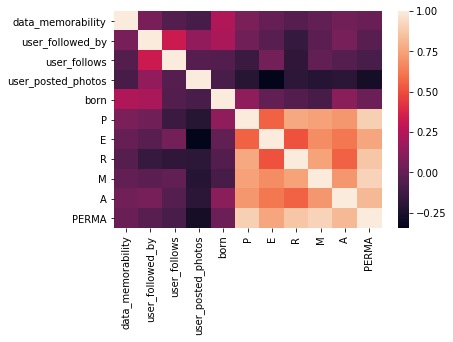

In [93]:
import seaborn as sns
corr = corrTest.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

plt.show()

In [8]:
# Single Image Example
object_labels[object_labels['image_id']=='529138792104863023_3069744']

,image_id,data_amz_label,data_amz_label_confidence,user_id
21334,529138792104863023_3069744,Human,99.256577,3069744
38675,529138792104863023_3069744,People,99.263092,3069744
56140,529138792104863023_3069744,Person,99.263092,3069744
65116,529138792104863023_3069744,Face,87.534973,3069744
67923,529138792104863023_3069744,Portrait,87.534973,3069744
70139,529138792104863023_3069744,Smile,87.534973,3069744


In [17]:
# Grab top confidence label
object_labels.groupby('image_id').first().reset_index().drop(['data_amz_label_confidence'], axis=1)

,image_id,data_amz_label,user_id
0,1000004599066965477_545497348,Human,545497348
1,1000059425592054064_703978203,Human,703978203
2,1000065308809420330_46329534,Home Decor,46329534
3,1000080765059521113_31736205,Human,31736205
4,1000097452173278518_206726006,Human,206726006
5,1000118559875482297_555477511,Plant,555477511
6,1000126179441391393_30837828,Human,30837828
7,1000135251972767429_31447990,Human,31447990
8,1000159024449036821_265063047,Human,265063047
9,1000185226634350811_276232195,Human,276232195


In [18]:
'''
Here we will generate counts/ratio of certain labels that appear in a users photos
'''

# Take only labels with at least 95% confidence
labels = object_labels[object_labels['data_amz_label_confidence'] >= 95]
labels['data_amz_label'].nunique()

1503

In [11]:
labels[labels['image_id'] == '1243053985413665145_372088523']

,image_id,data_amz_label,data_amz_label_confidence,user_id
37,1243053985413665145_372088523,Animal,98.650826,372088523
4367,1243053985413665145_372088523,Mammal,98.650826,372088523
6232,1243053985413665145_372088523,Pet,98.650826,372088523
83500,1243053985413665145_372088523,Cat,98.650826,372088523


In [19]:
# Get top 50 labels that have at least 95% confidence
top50Labels = labels['data_amz_label'].value_counts().head(50).index.values

In [20]:
# Get all rows that have just top 50 labels
labels = labels[labels['data_amz_label'].isin(top50Labels)]

In [21]:
# Encode and aggregate
labelCounts = pd.get_dummies(labels, columns=['data_amz_label']).groupby('user_id')\
                                                                .sum()\
                                                                .reset_index()\
                                                                .drop(['data_amz_label_confidence'], axis=1)

In [22]:
#labelCounts.info()
#usersSurvey.info()
#image_data.info()
#survey.info()

# Cast user_id to int
labelCounts['user_id'] = labelCounts['user_id'].apply(int)

# Uneeded columns
# dropColumns = ['index_y', 'id_y','A_2_y', 'N_1_y',
# 'P_1_y', 'E_1_y', 'A_1_y', 'H_1_y', 'M_1_y', 'R_1_y', 'M_2_y', 'E_2_y', 'LON_y', 'H_2_y',
# 'P_2_y', 'N_2_y', 'A_3_y', 'N_3_y', 'E_3_y', 'H_3_y', 'R_2_y', 'M_3_y', 'R_3_y', 'P_3_y',
# 'HAP_y', 'participate_y', 'completed_y', 'start_q_y', 'end_q_y', 'network_id_y',
# 'N_EMO_y', 'P_EMO_y', 'private_account_y',]

labelCounts = labelCounts.merge(survey, how='left', on='user_id')#.drop(dropColumns, axis=1)

In [23]:
labelCounts

,user_id,data_amz_label_Alcohol,data_amz_label_Animal,data_amz_label_Automobile,data_amz_label_Beverage,data_amz_label_Blossom,data_amz_label_Book,data_amz_label_Bottle,data_amz_label_Bowl,data_amz_label_Brochure,...,P,E,R,M,A,PERMA,N_EMO,P_EMO,imagecount,private_account
0,1097967773,0.0,0.0,0.0,0.0,0.0,1.0,2.0,5.0,0.0,...,4.666667,4.666667,5.666667,6.333333,4.666667,5.200000,6.000000,4.666667,282.0,public
1,11520833,0.0,13.0,4.0,0.0,0.0,0.0,4.0,0.0,3.0,...,8.000000,7.000000,8.333333,7.000000,8.000000,7.666667,2.666667,8.000000,312.0,public
2,1223036636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.333333,6.333333,9.333333,9.666667,8.333333,8.400000,2.666667,8.333333,48.0,public
3,1224423305,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,...,9.666667,8.333333,9.333333,10.000000,8.666667,9.200000,5.000000,9.666667,41.0,public
4,1249457735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.333333,6.666667,7.666667,7.333333,7.666667,7.133333,5.333333,6.333333,30.0,public
5,1308763259,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,6.666667,8.333333,8.000000,7.666667,8.333333,7.800000,4.000000,6.666667,63.0,public
6,13745951,5.0,20.0,7.0,5.0,0.0,1.0,3.0,2.0,1.0,...,7.666667,7.666667,8.666667,8.666667,6.000000,7.733333,2.666667,7.666667,710.0,public
7,1414011473,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,8.000000,9.000000,8.000000,6.666667,7.000000,7.733333,2.333333,8.000000,98.0,public
8,1429720420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,8.333333,8.333333,10.000000,9.666667,9.000000,9.066667,2.666667,8.333333,16.0,public
9,143763900,3.0,6.0,4.0,6.0,3.0,0.0,3.0,1.0,2.0,...,8.000000,8.666667,8.333333,9.000000,6.666667,8.133333,4.000000,8.000000,771.0,public


In [24]:
# Divide each total nuber of occurances by total images posted to get a ratio
labelCounts.iloc[:,1:51] = labelCounts.iloc[:,1:51].divide(labelCounts.imagecount, axis=0)

In [25]:
labelCounts

,user_id,data_amz_label_Alcohol,data_amz_label_Animal,data_amz_label_Automobile,data_amz_label_Beverage,data_amz_label_Blossom,data_amz_label_Book,data_amz_label_Bottle,data_amz_label_Bowl,data_amz_label_Brochure,...,P,E,R,M,A,PERMA,N_EMO,P_EMO,imagecount,private_account
0,1097967773,0.000000,0.000000,0.000000,0.000000,0.000000,0.003546,0.007092,0.017730,0.000000,...,4.666667,4.666667,5.666667,6.333333,4.666667,5.200000,6.000000,4.666667,282.0,public
1,11520833,0.000000,0.041667,0.012821,0.000000,0.000000,0.000000,0.012821,0.000000,0.009615,...,8.000000,7.000000,8.333333,7.000000,8.000000,7.666667,2.666667,8.000000,312.0,public
2,1223036636,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.333333,6.333333,9.333333,9.666667,8.333333,8.400000,2.666667,8.333333,48.0,public
3,1224423305,0.000000,0.000000,0.000000,0.000000,0.024390,0.000000,0.000000,0.097561,0.000000,...,9.666667,8.333333,9.333333,10.000000,8.666667,9.200000,5.000000,9.666667,41.0,public
4,1249457735,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.333333,6.666667,7.666667,7.333333,7.666667,7.133333,5.333333,6.333333,30.0,public
5,1308763259,0.015873,0.000000,0.000000,0.015873,0.000000,0.000000,0.000000,0.015873,0.000000,...,6.666667,8.333333,8.000000,7.666667,8.333333,7.800000,4.000000,6.666667,63.0,public
6,13745951,0.007042,0.028169,0.009859,0.007042,0.000000,0.001408,0.004225,0.002817,0.001408,...,7.666667,7.666667,8.666667,8.666667,6.000000,7.733333,2.666667,7.666667,710.0,public
7,1414011473,0.000000,0.051020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.051020,...,8.000000,9.000000,8.000000,6.666667,7.000000,7.733333,2.333333,8.000000,98.0,public
8,1429720420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,...,8.333333,8.333333,10.000000,9.666667,9.000000,9.066667,2.666667,8.333333,16.0,public
9,143763900,0.003891,0.007782,0.005188,0.007782,0.003891,0.000000,0.003891,0.001297,0.002594,...,8.000000,8.666667,8.333333,9.000000,6.666667,8.133333,4.000000,8.000000,771.0,public


In [26]:
# ['index_x',
# 'id_x',
# 'gender_x',
# 'born_x',
# 'education_x',
# 'employed_x',
# 'income_x',
# 'A_2_x',
# 'N_1_x',
# 'P_1_x',
# 'E_1_x',
# 'A_1_x',
# 'H_1_x',
# 'M_1_x',
# 'R_1_x',
# 'M_2_x',
# 'E_2_x',
# 'LON_x',
# 'H_2_x',
# 'P_2_x',
# 'N_2_x',
# 'A_3_x',
# 'N_3_x',
# 'E_3_x',
# 'H_3_x',
# 'R_2_x',
# 'M_3_x',
# 'R_3_x',
# 'P_3_x',
# 'HAP_x',
# 'participate_x',
# 'completed_x',
# 'start_q_x',
# 'end_q_x',
# 'network_id_x',
# 'P_x',
# 'E_x',
# 'R_x',
# 'M_x',
# 'A_x',
# 'PERMA_x',
# 'N_EMO_x',
# 'P_EMO_x',
# 'imagecount_x',
# 'private_account_x',
# 'gender_y',
# 'born_y',
# 'education_y',
# 'employed_y',
# 'income_y',
# 'P_y',
# 'E_y',
# 'R_y',
# 'M_y',
# 'A_y',
# 'PERMA_y',
# 'imagecount_y',
# 'index']

dropColumns2 = ['index', 'id',
'A_2',
'N_1',
'P_1',
'E_1',
'A_1',
'H_1',
'M_1',
'R_1',
'M_2',
'E_2',
'LON',
'H_2',
'P_2',
'N_2',
'A_3',
'N_3',
'E_3',
'H_3',
'R_2',
'M_3',
'R_3',
'P_3',
'HAP',
'participate',
'completed',
'start_q',
'end_q',
'network_id',
'N_EMO',
'P_EMO',
'private_account']
labelCounts.drop(dropColumns2, axis =1, inplace=True)

In [27]:
labelCounts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 0 to 150
Data columns (total 63 columns):
user_id                              151 non-null int64
data_amz_label_Alcohol               150 non-null float64
data_amz_label_Animal                150 non-null float64
data_amz_label_Automobile            150 non-null float64
data_amz_label_Beverage              150 non-null float64
data_amz_label_Blossom               150 non-null float64
data_amz_label_Book                  150 non-null float64
data_amz_label_Bottle                150 non-null float64
data_amz_label_Bowl                  150 non-null float64
data_amz_label_Brochure              150 non-null float64
data_amz_label_Cake                  150 non-null float64
data_amz_label_Canine                150 non-null float64
data_amz_label_Car                   150 non-null float64
data_amz_label_Cat                   150 non-null float64
data_amz_label_Clothing              150 non-null float64
data_amz_label_Collage     

In [24]:
labelsCorr = labelCounts.corr()
sns.heatmap(labelsCorr, 
            xticklabels=labelsCorr.columns.values,
            yticklabels=labelsCorr.columns.values)

plt.show()

NameError: name 'sns' is not defined

In [28]:
# One hot encode
labelCounts = pd.get_dummies(labelCounts, columns=['gender', 'education','income', 'employed'], drop_first=True)

In [29]:
# Remove the one row that is all NaNs
labelCounts.dropna(inplace=True)

In [30]:
# Combine all human related % into one category
labelCounts['data_amz_label_Human'] = labelCounts['data_amz_label_Human'] + \
                                      labelCounts['data_amz_label_People'] + \
                                      labelCounts['data_amz_label_Person']
labelCounts.drop(labels=['data_amz_label_People','data_amz_label_Person'], axis=1, inplace=True)

In [32]:
labelCounts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 150
Data columns (total 80 columns):
user_id                                                    150 non-null int64
data_amz_label_Alcohol                                     150 non-null float64
data_amz_label_Animal                                      150 non-null float64
data_amz_label_Automobile                                  150 non-null float64
data_amz_label_Beverage                                    150 non-null float64
data_amz_label_Blossom                                     150 non-null float64
data_amz_label_Book                                        150 non-null float64
data_amz_label_Bottle                                      150 non-null float64
data_amz_label_Bowl                                        150 non-null float64
data_amz_label_Brochure                                    150 non-null float64
data_amz_label_Cake                                        150 non-null float64
data_amz_label_Ca

In [33]:
# Split data into predictors and targets
X = labelCounts.drop(labels=['P','E','R','M','A','PERMA'], axis=1)
Y_perma = labelCounts['PERMA']
Y_p = labelCounts['P']
Y_e = labelCounts['E']
Y_r = labelCounts['R']
Y_m = labelCounts['M']
Y_a = labelCounts['A']

In [35]:
X.to_pickle('object_labels_user_aggregate.pkl')

In [346]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y_perma, test_size = 0.3, random_state = 0)

In [347]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [348]:
np.all(np.isfinite(X_train))

True

In [349]:
np.any(np.isnan(X_train))

False

In [371]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV

selector = RFECV(LinearRegression(), step=1, cv=5)
selector.fit(X_train, y_train)
selector.get_support()

RFECV(cv=5,
   estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
   n_jobs=1, scoring=None, step=1, verbose=0)

In [372]:
y_pred = selector.predict(X_test)

In [373]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

mean_squared_error(y_test, y_pred)         

1.8964767307511678

In [374]:
#list(selector.get_support()).index(True)
selector.get_support()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [393]:
X.iloc[:,30].name

'data_amz_label_Human'

Optimal number of features : 2


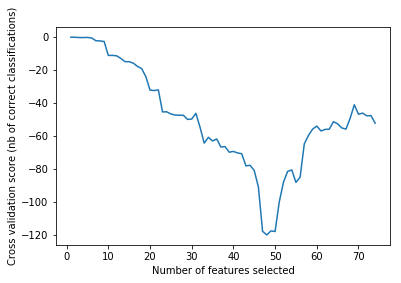

In [395]:
print("Optimal number of features : %d" % selectorFit.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.show()